Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


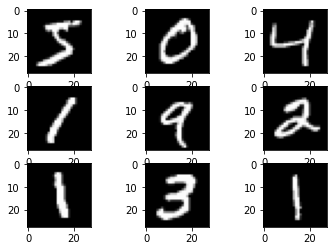

(60000, 10) (10000, 10)


In [27]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# normalization
X_train = X_train/255
X_test = X_test/255

# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()


from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(f"{y_train.shape} {y_test.shape}")


In [28]:
X_train_flatten = X_train.reshape((X_train.shape[0], 28*28))
X_test_flatten = X_test.reshape((X_test.shape[0], 28*28))
print(X_train_flatten.shape, X_test_flatten.shape)

(60000, 784) (10000, 784)


"\nh = model.fit(X_train_flatten, y_train, batch_size=64, epochs=10, verbose=0, validation_split=0.2)\n\nhistory = h.history\n\nplt.plot(history['loss'])\nplt.plot(history['val_loss'])\nplt.show()\n\nplt.plot(history['accuracy'])\nplt.plot(history['val_accuracy'])\nplt.show()\n\nprint(model.evaluate(X_test_flatten, y_test))\n"

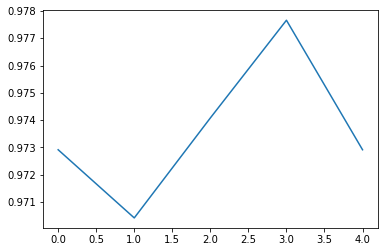

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

n_folds = 5
scores, histories = list(), list()
# prepare cross validation
kfold = KFold(n_folds, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(X_train_flatten):
    adam = Adam(0.001)

    model = Sequential(
        layers=[
            Dense(128, activation='relu', input_shape=(28*28,)),
            Dense(64, activation="relu"),
            Dense(10, activation="softmax")
        ]
    )

    model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=['accuracy'])

    # select rows for train and test
    trainX = X_train_flatten[train_ix]
    trainY = y_train[train_ix]
    testX = X_train_flatten[test_ix]
    testY = y_train[test_ix]
    
    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    # print('> %.3f' % (acc * 100.0))
    # stores scores
    scores.append(acc)
    histories.append(history)


plt.plot(scores)
  
"""
h = model.fit(X_train_flatten, y_train, batch_size=64, epochs=10, verbose=0, validation_split=0.2)

history = h.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.show()

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.show()

print(model.evaluate(X_test_flatten, y_test))
"""

# Convolutional Neural Network

In [32]:
X_train_convolutional = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test_convolutional = X_test.reshape((X_test.shape[0], 28, 28, 1))

375/375 [==============================] - 2s 5ms/step - loss: 0.0745 - accuracy: 0.9871


"\nplt.plot(history_c['loss'])\nplt.plot(history_c['val_loss'])\nplt.show()\nplt.plot(history_c['accuracy'])\nplt.plot(history_c['val_accuracy'])\nplt.show()\nprint(model_convolutional.evaluate(X_test_convolutional, y_test))\n"

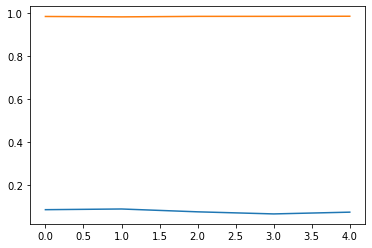

In [35]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

n_folds = 5
scores = list()
histories = list()

k_fold = KFold(n_folds, shuffle=True, random_state=1)
for index_train, index_test in k_fold.split(X_train_convolutional):
        

    model_convolutional = Sequential(
        layers=[
            Conv2D(32, 3, kernel_initializer='he_uniform', activation='relu', input_shape=(28,28,1)),
            MaxPooling2D(),
            Flatten(),
            Dense(100, kernel_initializer='he_uniform', activation='relu'),
            Dropout(0.2),
            Dense(10, activation='softmax')
        ]
    )

    adam_convolution = Adam(0.001)
    model_convolutional.compile(
        optimizer=adam_convolution,
        loss="categorical_crossentropy",
        metrics=['accuracy']
    )
    
    trainX = X_train_convolutional[index_train]
    trainY = y_train[index_train]
    testX = X_train_convolutional[index_test]
    testY = y_train[index_test]

    h_c = model_convolutional.fit(trainX, trainY, batch_size=32, epochs=20, verbose=0, validation_split=0.2)
    history_c = h_c.history
    
    histories.append(history_c)
    scores.append(model_convolutional.evaluate(testX, testY))
    

"""
plt.plot(history_c['loss'])
plt.plot(history_c['val_loss'])
plt.show()
plt.plot(history_c['accuracy'])
plt.plot(history_c['val_accuracy'])
plt.show()
print(model_convolutional.evaluate(X_test_convolutional, y_test))
"""

In [37]:
scores

[[0.08601865917444229, 0.9860000014305115],
 [0.08924508839845657, 0.98416668176651],
 [0.07604308426380157, 0.9865000247955322],
 [0.0663057193160057, 0.9865833520889282],
 [0.07450396567583084, 0.9870833158493042]]